In [1]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter
from IPython.display import set_matplotlib_formats 

In [3]:
# 데이터 불러오기
data = pd.read_csv('../Data Collection/[데이터] 장애인 뉴스 키워드 (2017~2021).csv' , encoding='utf-8-sig')
data.head()

,일자,제목,키워드,특성추출(가중치순 상위 50개),분석제외 여부
0,20211231,[든든한 데이터댐! 데이터 활용으로 사회현안 분석하다] ②NIA 데이터 멘토링,"데이터댐,데이터,활용,사회현안,멘토링,NIA,데이터,과학기술정보통신부,한국지능정보사...","장애인,빅데이터,충전기,경기도,멘토,충전소,분석가,청년정책,라이프로그",NaN
1,20211231,뇌병변장애인 놀이부터 교육 건강까지 챙긴다,"뇌병변,장애인,놀이,교육,건강,ㄱ씨,서울,마포구,공덕동,주민,편안,공간,매일,방문,...","서울시,장애인,의사소통,영유아,뇌병변장애인,비장애,마포,일상생활,사회성,놀이방,학령...",NaN
2,20211231,"""장애인 관심부족 여전""","장애인,관심,부족,문화예술,도내,공공,문화,예술,체육,시설,체육,장애인,편의,시설,...","장애인,공공시설,제주장애인인권포럼,문화예술,제주,장애인들,0곳,83곳,쓴소리,시설,...",NaN
3,20211231,창고된 화장실...,"창고,화장실,공공시설,장애인,외면,문화,제주,지역,공공,예술,체육,시설,장애인,편의...","장애인,화장실,제주,보청기,공공시설,26곳,대변기,5m,4곳,66곳,19곳,주차장,...",NaN
4,20211229,"청주 미동산수목원, 내년 1월 2일부터 입장료 유료","청주,미동산수목원,2일,내년,입장료,유료,어른,어린이,1500원,청주,충북도,산림환...","미동산수목원,입장료,입장객,대상자,신분증,매표소,산림문화체험,수익금,조원삼,청주,자...",NaN


In [4]:
# 뉴스 키워트 리스트
key_words = data['특성추출(가중치순 상위 50개)']
key_word = list()

for i in range(len(key_words)):
    word = key_words[i].split(',')
    key_word.extend(word)
print(len(key_word))

119510


In [5]:
# 불용어 처리
stop_words = ['장애인' , '장애인들'  , '그동안' , '편의 시설' , '편의' , '시설' , '관계자' , '사업비' , '만큼' , '위원회' ,'비장애인' ,'무장애']

key_word = [word for word in key_word if not word in stop_words]
print(len(key_word))

111164


In [6]:
# 가장 많이 나온 키워드 (상위 60개)
counts = Counter(key_word)
tags = counts.most_common(60)
print(tags)

[('편의시설', 1382), ('화장실', 845), ('서울', 515), ('일자리', 429), ('설치', 328), ('주차장', 305), ('경기도', 298), ('시민들', 296), ('서울시', 288), ('코로나19', 285), ('교통약자', 274), ('이용자', 261), ('대상자', 256), ('관광지', 252), ('관광객', 247), ('한국', 243), ('사업', 239), ('주민들', 231), ('지원', 229), ('노약자', 220), ('수급자', 219), ('복지관', 211), ('출입구', 210), ('홈페이지', 210), ('경사로', 205), ('접근성', 199), ('이용객', 193), ('고령자', 191), ('활성화', 189), ('시설물', 189), ('지자체', 189), ('시각장애인', 188), ('사업장', 181), ('도서관', 174), ('전문가', 174), ('개선', 169), ('광주', 168), ('이용', 167), ('장애물', 163), ('공무원', 162), ('평창', 162), ('음식점', 159), ('승강기', 154), ('충남', 153), ('농어촌', 153), ('취약계층', 153), ('경기장', 148), ('부산', 147), ('구청장', 144), ('공공기관', 139), ('근로자', 137), ('충북', 136), ('대구', 134), ('쉼터', 131), ('체육관', 127), ('이사장', 126), ('지역사회', 125), ('생활환경', 123), ('공동주택', 123), ('경로당', 122)]


In [21]:
# 워드 클라우드 이미지
masking_img = np.array(Image.open('disable_photo.png'))

C:\Users\phi49\AppData\Local\Temp\ipykernel_24248\2571074661.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


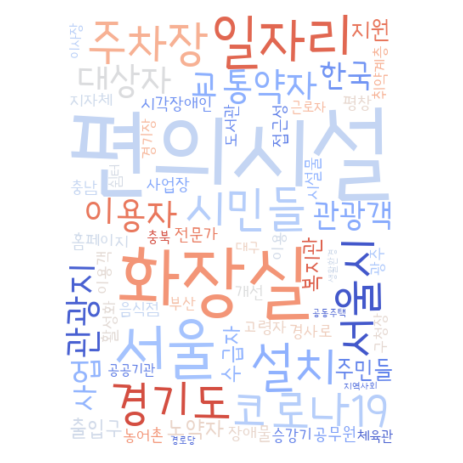

In [24]:
# 워드 클라우드 만들기
cloud = WordCloud(font_path='./font/Goyang.ttf', max_font_size=400,
                  mask=masking_img, background_color='white' , colormap='coolwarm',
                  width=800, height=800).fit_words(dict(tags))
set_matplotlib_formats('retina')

# 생성된 WordCloud를 news_wordcloud.png로 보냄
cloud.to_file('./images/news_wordcloud.png')

# 화면에 띄우기
plt.imshow(cloud, interpolation='bilinear' )
plt.axis('off')
plt.show()